<a href="https://colab.research.google.com/github/hckasd/p/blob/main/Phanloaiemail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("spam2.csv", encoding="latin-1")

Saving spam2.csv to spam2 (1).csv


In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
from sklearn.preprocessing import LabelEncoder


# 1. Load dữ liệu
df = pd.read_csv("spam2.csv", encoding="latin-1")[['v1', 'v2']]
df.columns = ['v1', 'v2']
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})  # Chuyển đổi nhãn sang số
df.head()


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


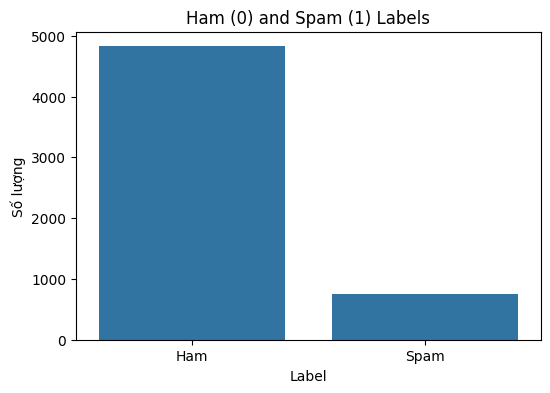

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['v1'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Ham (0) and Spam (1) Labels')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.xlabel('Label')
plt.ylabel('Số lượng')
plt.show()

In [ ]:
import re

df['num_characters'] = df['v2'].apply(len)
df['num_words'] = df['v2'].apply(lambda x: len(x.split()))
df['num_sentences'] = df['v2'].apply(lambda x: len(re.findall(r'[.!?]', x)))

display(df.head())

,v1,v2,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [ ]:
# Display descriptive statistics for the numerical features
print(df[['num_characters', 'num_words', 'num_sentences']].describe())

       num_characters    num_words  num_sentences
count     5572.000000  5572.000000    5572.000000
mean        80.118808    15.494436       2.507179
std         59.690841    11.329427       2.770680
min          2.000000     1.000000       0.000000
25%         36.000000     7.000000       1.000000
50%         61.000000    12.000000       2.000000
75%        121.000000    23.000000       3.000000
max        910.000000   171.000000      42.000000


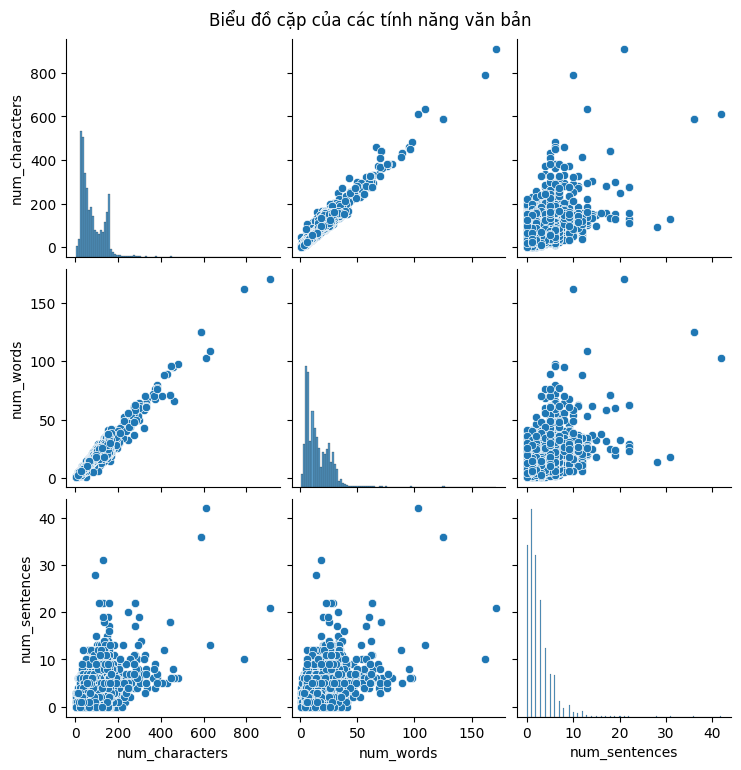

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['num_characters', 'num_words', 'num_sentences']])
plt.suptitle('Biểu đồ cặp của các tính năng văn bản', y=1.02)
plt.show()

In [ ]:
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # Xoá dấu câu
    text = re.sub(r"\d+", "", text)  # Xoá số
    return text

df['v2'] = df['v2'].apply(clean_text)
display(df.head())

,v1,v2,num_characters,num_words,num_sentences
0,0,go until jurong point crazy available only in ...,111,20,8
1,0,ok lar joking wif u oni,29,6,6
2,1,free entry in a wkly comp to win fa cup final...,155,28,1
3,0,u dun say so early hor u c already then say,49,11,6
4,0,nah i dont think he goes to usf he lives aroun...,61,13,0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


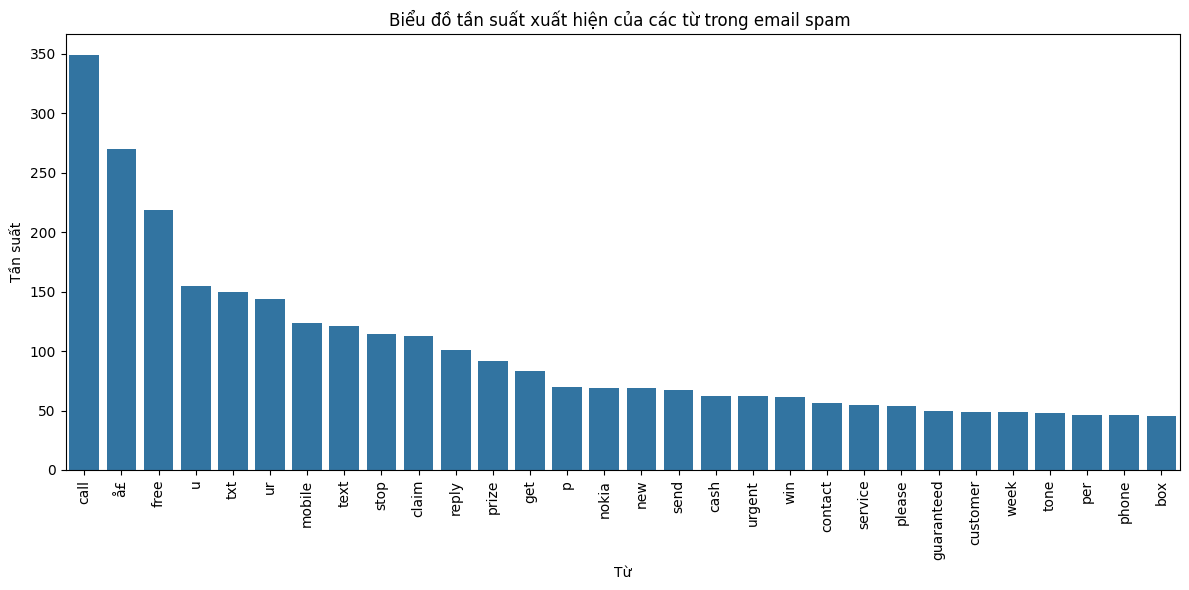

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))


word_counts = Counter()
for text in df[df['v1'] == 1]['v2'].str.split():
    word_counts.update([word for word in text if word not in stopwords])


N=30
top_words = word_counts.most_common(N)
df_word_frequencies = pd.DataFrame(top_words, columns=['word', 'frequency'])
if df_word_frequencies.empty:
    print("error")
else:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='word', y='frequency', data=df_word_frequencies)
    plt.xlabel('Từ')
    plt.ylabel('Tần suất')
    plt.title('Biểu đồ tần suất xuất hiện của các từ trong email spam ')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

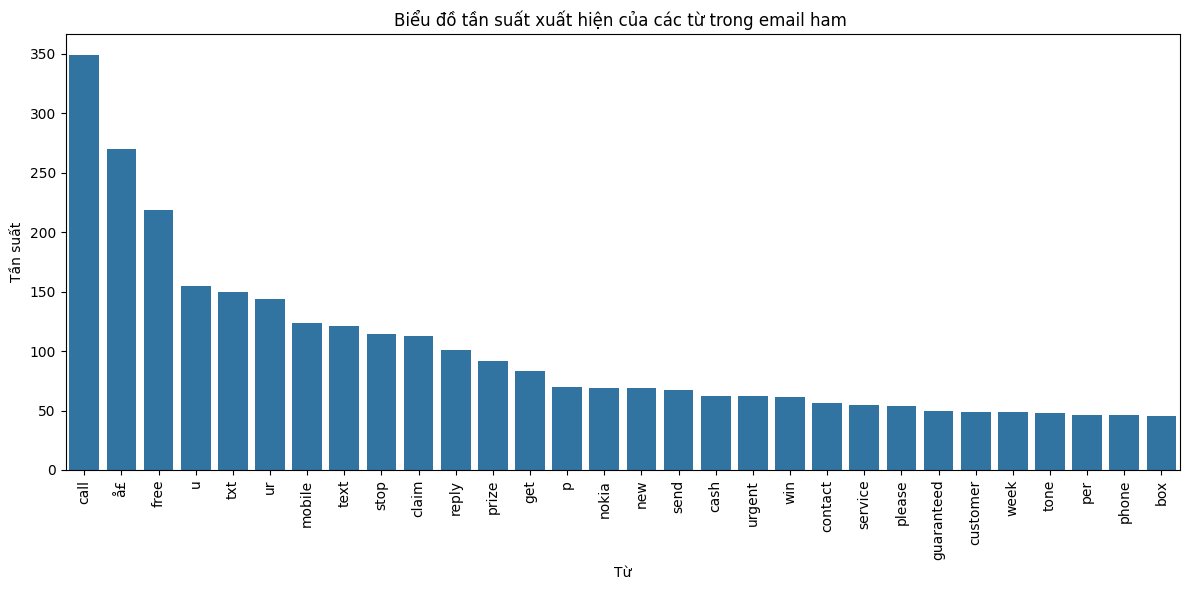

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

N = 30
top_words = word_counts.most_common(N)
df_word_frequencies = pd.DataFrame(top_words, columns=['word', 'frequency'])

if df_word_frequencies.empty:
    print("error")
else:
    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='word', y='frequency', data=df_word_frequencies)
    plt.xlabel('Từ')
    plt.ylabel('Tần suất')
    plt.title('Biểu đồ tần suất xuất hiện của các từ trong email ham ')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['v2'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['v2'])
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Gaussian Naive Bayes
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


gnb.fit(X_train.toarray(), y_train)
y_pred1 = gnb.predict(X_test.toarray())
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

# Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

# Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.8663677130044843
[[836 129]
 [ 20 130]]
0.5019305019305019
0.9730941704035875
[[965   0]
 [ 30 120]]
1.0
0.9739910313901345
[[961   4]
 [ 25 125]]
0.9689922480620154


In [ ]:
from tabulate import tabulate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel="linear", probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    results.append([name, acc, prec])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision"])
results_df = results_df.round(4)

print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:26:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


╒════╤═════════════════════╤════════════╤═════════════╕
│    │ Model               │   Accuracy │   Precision │
╞════╪═════════════════════╪════════════╪═════════════╡
│  0 │ Logistic Regression │     0.9516 │      0.98   │
├────┼─────────────────────┼────────────┼─────────────┤
│  1 │ SVM                 │     0.9821 │      0.9851 │
├────┼─────────────────────┼────────────┼─────────────┤
│  2 │ Random Forest       │     0.974  │      1      │
├────┼─────────────────────┼────────────┼─────────────┤
│  3 │ Naive Bayes         │     0.9731 │      1      │
├────┼─────────────────────┼────────────┼─────────────┤
│  4 │ kNN                 │     0.9193 │      1      │
├────┼─────────────────────┼────────────┼─────────────┤
│  5 │ XGBoost             │     0.9659 │      0.9516 │
╘════╧═════════════════════╧════════════╧═════════════╛


In [ ]:
joblib.dump(model, "spam_classifier.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken "308wFZ9cGK2fsa4SsuQhFlWY67A_65j1sDc5murCNqGGeW4Kd"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
%%writefile app.py
import streamlit as st
import joblib

# Load mô hình và vectorizer
model = joblib.load("spam_classifier.pkl")
vectorizer = joblib.load("vectorizer.pkl")

# Giao diện
st.title("📧 Phân loại Email: Spam hay Không Spam")
st.write("Nhập nội dung email bên dưới để kiểm tra:")

# Nhập nội dung email
email_input = st.text_area("✉️ Nội dung email", height=200)

# Nút dự đoán
if st.button("Dự đoán"):
    if email_input.strip() == "":
        st.warning("Vui lòng nhập nội dung email.")
    else:
        email_vector = vectorizer.transform([email_input])
        prediction = model.predict(email_vector)[0]
        label = "🚫 SPAM" if prediction == 1 else "✅ KHÔNG SPAM"
        st.subheader("Kết quả:")
        st.success(f"Nội dung email được phân loại là: **{label}**")

Overwriting app.py


In [ ]:
from pyngrok import ngrok

ngrok.kill()


In [ ]:
#Chay App
from pyngrok import ngrok
public_url = ngrok.connect(8501, "http")
print(f"Truy cập Streamlit tại: {public_url}")
!streamlit run app.py

Truy cập Streamlit tại: NgrokTunnel: "https://eba1a30cde2f.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.169.253.42:8501

  Stopping...
  Stopping...
